# Imports and Loading Data

In [1]:
import pandas as pd

In [2]:
from pandas_profiling import ProfileReport

/tmp/ipykernel_112/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
DATA_PATH = './Data/'

In [4]:
OUTPUT_PATH = './Output/'

In [5]:
df = pd.read_csv(f"{DATA_PATH}Iddo_v7_5LA.csv")

/tmp/ipykernel_112/1592553496.py:1: DtypeWarning: Columns (105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{DATA_PATH}Iddo_v7_5LA.csv")


In [6]:
# df_sample = df.sample(frac=0.1) # Selecting a sample to avoid session crash

# EDA

In [7]:
# profile = ProfileReport(df_sample, title="Pandas Profiling Report",minimal=True)

In [8]:
# df_sample.profile_report()

In [9]:
# df_sample

In [10]:
# profile.to_file("trading_classification_report.html")

In [11]:
# df_sample.head()

# Correlation Analysis

Correlation cofficent is too low. On 0.5 on Target column, 0.3 only 4 columns and 0.08 getting the following. These are not helpful directly

In [12]:
# # Assume that your_dataframe is a pandas DataFrame
# correlations = df_sample.corrwith(df_sample['TOUCH']).abs()
# features =  correlations[correlations > 0.08].index.tolist()

In [13]:
# # getting a random sample
# df2= df[100000:].sample(frac=0.03)

In [14]:
# df2 = df2[features]

In [15]:
# df2 = df2.dropna()
# y_test = df2['TOUCH']
# df2 = df2.drop(['TOUCH'],axis=1)


In [16]:
# df1=df_sample[features]

## Runing Random Forest On it. 

In [17]:
from sklearn.ensemble import RandomForestClassifier

# 

In [18]:
# Instantiate the classifier
# rf = RandomForestClassifier()
# 

In [19]:
# df1 = df1.dropna()

In [20]:
# target = df1['TOUCH']

In [21]:
# df1 = df1.drop(['TOUCH'],axis=1)

In [22]:
# model=rf.fit(df1, target)

In [23]:
# y_pred = model.predict(df2)

In [24]:
# from sklearn.metrics import accuracy_score

In [25]:
# accuracy_score(y_test, y_pred)

However, getting the 100% accuracy but it is not somehow good. I need more description of columns 

# Splitting Train and Test

In [31]:
from sklearn.model_selection import train_test_split

In [60]:
# getting data type of all columns and deleting object column
# for column in df.columns:
#     print(column,df[column].dtype)

In [34]:
target = df['TOUCH']

In [53]:
X = df.drop(['timestamp','DD','DC','TOUCH'],axis=1)

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,target, test_size=0.15, random_state=42)

In [55]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((278703, 142), (49184, 142), (278703,), (49184,))

# Random Forest Classification

## Before Feature Selection

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,f1_score

In [74]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)

In [58]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred = rfc.predict(X_test)

In [68]:
print(classification_report(y_pred,y_test)),print('Accuracy Score: ',accuracy_score(y_pred,y_test)),print('F1 Score: ',f1_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37520
           1       1.00      1.00      1.00     11664

    accuracy                           1.00     49184
   macro avg       1.00      1.00      1.00     49184
weighted avg       1.00      1.00      1.00     49184

Accuracy Score:  0.9999796681847756
F1 Score:  0.9999571348964807


(None, None, None)

## Feature Importance

In [69]:
importances = rfc.feature_importances_

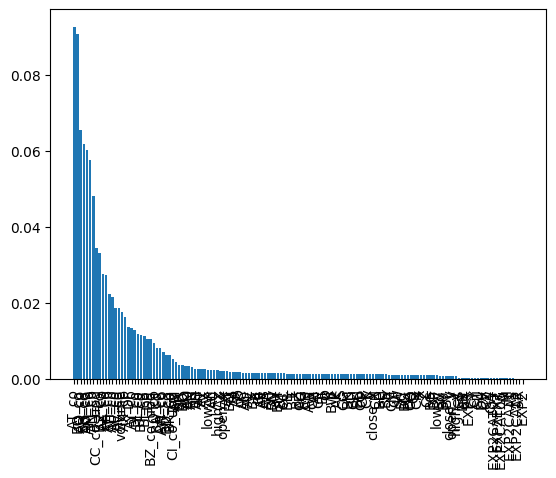

In [84]:
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(X.columns)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [85]:
labels

array(['AT_co', 'BQ_co', 'AQ_co', 'BR_co', 'AO_co', 'AM_co', 'AN_co',
       'CC_co_upd', 'BS_co', 'AZ_co', 'AF_co', 'AH_co', 'AU_co', 'AE_co',
       'AV_co', 'volume', 'AX_co', 'DF', 'AY_co', 'BJ_co', 'L_co',
       'BT_co', 'BI_co', 'DE', 'BZ_co_upd', 'O_co', 'BA_co', 'R_co',
       'AW_co', 'BD_co', 'BK_co', 'CI_co_upd', 'AM', 'BR', 'BQ', 'AO',
       'AQ', 'AN', 'BS', 'AH', 'AT', 'AX', 'low_x', 'AF', 'AU', 'high_x',
       'AZ', 'open_x', 'AY', 'BO', 'AJ', 'AP', 'O', 'AC', 'AD', 'AL',
       'BX', 'R', 'BJ', 'AE', 'AB', 'AA', 'BN', 'AV', 'BM', 'BT', 'CC',
       'BB', 'L', 'T', 'BZ', 'CD', 'AG', 'CB', 'AW', 'CA', 'AI', 'CE',
       'BI', 'Q', 'K', 'BW', 'P', 'AK', 'S', 'CG', 'BK', 'CI', 'CH', 'BL',
       'CQ', 'CP', 'CK', 'V', 'close_x', 'CN', 'BE', 'U', 'BF', 'Y', 'CM',
       'CF', 'W', 'BC', 'BD', 'BA', 'CO', 'CJ', 'CR', 'X', 'Z', 'CL',
       'BG', 'BP', 'low_y', 'BV', 'BU', 'BY', 'close_y', 'open_y',
       'high_y', 'CS', 'DB', 'CX', 'EXP3', 'CT', 'CY', 'CU', 'DA', 'CV',
  

In [86]:
labels_30_important=labels[:30]

In [97]:
labels_30_important

array(['AT_co', 'BQ_co', 'AQ_co', 'BR_co', 'AO_co', 'AM_co', 'AN_co',
       'CC_co_upd', 'BS_co', 'AZ_co', 'AF_co', 'AH_co', 'AU_co', 'AE_co',
       'AV_co', 'volume', 'AX_co', 'DF', 'AY_co', 'BJ_co', 'L_co',
       'BT_co', 'BI_co', 'DE', 'BZ_co_upd', 'O_co', 'BA_co', 'R_co',
       'AW_co', 'BD_co'], dtype=object)

In [87]:
X_important = X[labels_30_important]

## After Feature Selection

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X_important,target, test_size=0.15, random_state=42)

In [90]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((278703, 30), (49184, 30), (278703,), (49184,))

In [91]:
rfm = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)

In [92]:
rfm.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [94]:
y_pred = rfm.predict(X_test)

In [95]:
print(classification_report(y_pred,y_test)),print('Accuracy Score: ',accuracy_score(y_pred,y_test)),print('F1 Score: ',f1_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37646
           1       0.99      1.00      0.99     11538

    accuracy                           1.00     49184
   macro avg       0.99      1.00      1.00     49184
weighted avg       1.00      1.00      1.00     49184

Accuracy Score:  0.9971332140533506
F1 Score:  0.9939231995862604


(None, None, None)

## Saving Models

In [102]:
from joblib import dump,load

In [99]:
filename = 'random_forest_144_features.joblib'
dump(rfc, filename)

['random_forest_144_features.joblib']

In [100]:
filename = 'random_forest_30_features.joblib'
dump(rfm, filename)

['random_forest_30_features.joblib']

## Loading Models For Verification

In [103]:
loaded_model = load('random_forest_30_features.joblib')

In [104]:
y_pred_1 = loaded_model.predict(X_test)

In [105]:
print(classification_report(y_pred_1,y_test)),print('Accuracy Score: ',accuracy_score(y_pred_1,y_test)),print('F1 Score: ',f1_score(y_pred_1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37646
           1       0.99      1.00      0.99     11538

    accuracy                           1.00     49184
   macro avg       0.99      1.00      1.00     49184
weighted avg       1.00      1.00      1.00     49184

Accuracy Score:  0.9971332140533506
F1 Score:  0.9939231995862604


(None, None, None)

Loaded Successfully. :)  

**Comments:** 

1. Models got good level of accuracy 
2. 30 features are selected 
3. Same level of accuracy attained on Test Set.